# BRITISH AIRWAYS PROJECT

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('customer_booking.csv',encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: xlabel='booking_complete'>

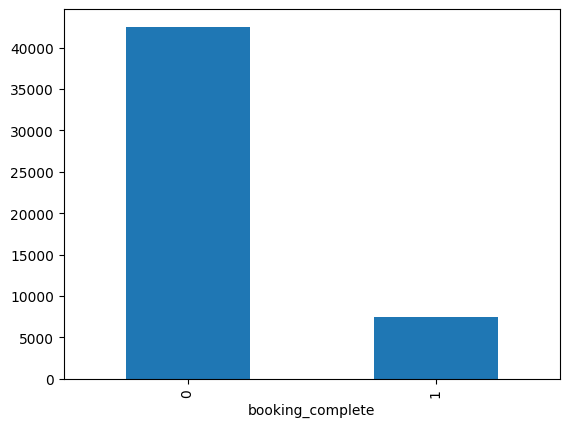

In [6]:
df['booking_complete'].value_counts().plot(kind='bar')

In [7]:
df.shape

(50000, 14)

In [8]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### SEPERATE CAT AND CON FEATURE

In [9]:
X= df.drop(columns=['booking_complete'])
Y= df[['booking_complete']]

In [10]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52


In [11]:
Y.head()

,booking_complete
0,0
1,0
2,0
3,0
4,0


In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [14]:
con

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

### Creating a pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
np1= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())])
cp1=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
            ('oe',OrdinalEncoder())])
pre= ColumnTransformer([('num',np1,con),
                        ('cat',cp1,cat)])

In [17]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 4.00684395e-01,  1.95753005e+00, -1.19353158e-01, ...,
         2.00000000e+00,  0.00000000e+00,  6.10000000e+01],
       [-5.79559256e-01,  2.99163939e-01, -8.98436051e-02, ...,
         2.00000000e+00,  0.00000000e+00,  6.10000000e+01],
       [ 4.00684395e-01,  1.74747034e+00, -3.08244988e-02, ...,
         6.00000000e+00,  0.00000000e+00,  3.60000000e+01],
       ...,
       [-5.79559256e-01, -6.73744178e-01, -5.02977349e-01, ...,
         2.00000000e+00,  7.20000000e+02,  4.00000000e+00],
       [-5.79559256e-01, -7.73246145e-01, -5.02977349e-01, ...,
         1.00000000e+00,  7.20000000e+02,  4.00000000e+00],
       [-5.79559256e-01, -7.29023048e-01, -5.02977349e-01, ...,
         4.00000000e+00,  7.20000000e+02,  4.00000000e+00]])

In [18]:
cols1=pre.get_feature_names_out()
cols1

array(['num__num_passengers', 'num__purchase_lead', 'num__length_of_stay',
       'num__flight_hour', 'num__wants_extra_baggage',
       'num__wants_preferred_seat', 'num__wants_in_flight_meals',
       'num__flight_duration', 'cat__sales_channel', 'cat__trip_type',
       'cat__flight_day', 'cat__route', 'cat__booking_origin'],
      dtype=object)

In [19]:
X_pre=pd.DataFrame(X_pre,columns=cols1)
X_pre.head()

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel,cat__trip_type,cat__flight_day,cat__route,cat__booking_origin
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.0,2.0,2.0,0.0,61.0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.0,2.0,2.0,0.0,61.0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.0,2.0,6.0,0.0,36.0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.0,2.0,2.0,0.0,61.0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.0,2.0,6.0,0.0,36.0


### CALCULATING MUTUAL INFO SCORE

In [20]:
from sklearn.feature_selection import mutual_info_classif

In [21]:
mi = mutual_info_classif(X_pre,Y)

In [22]:
mi

array([0.0043904 , 0.002504  , 0.00915974, 0.00119622, 0.00528085,
       0.00675481, 0.00469079, 0.01577416, 0.        , 0.00688798,
       0.0002868 , 0.05194378, 0.04514289])

In [23]:
mi=pd.Series(mi)

In [24]:
mi.index=cols1
mi=mi.sort_values(ascending=False)
mi

cat__route                    0.051944
cat__booking_origin           0.045143
num__flight_duration          0.015774
num__length_of_stay           0.009160
cat__trip_type                0.006888
num__wants_preferred_seat     0.006755
num__wants_extra_baggage      0.005281
num__wants_in_flight_meals    0.004691
num__num_passengers           0.004390
num__purchase_lead            0.002504
num__flight_hour              0.001196
cat__flight_day               0.000287
cat__sales_channel            0.000000
dtype: float64

In [88]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Feature dependence to booking complete'}>

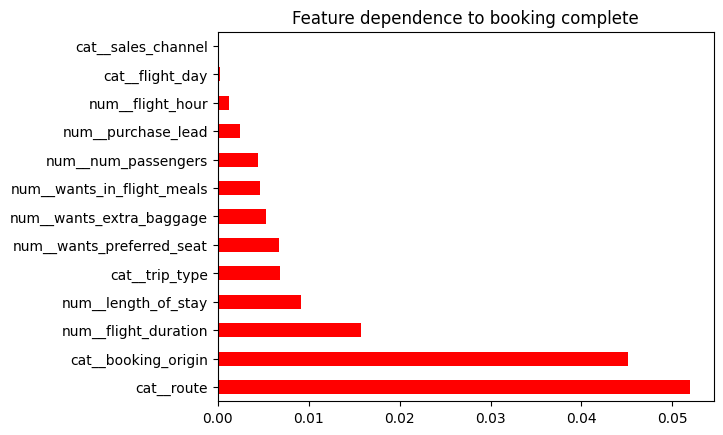

In [92]:
mi.plot(kind='barh',title="Feature dependence to booking complete",color='red')



In [26]:
imp_cols= []

In [27]:
for i in cols1:
    s=i.split('__')[1]
    imp_cols.append(s)

In [28]:
imp_cols

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'sales_channel',
 'trip_type',
 'flight_day',
 'route',
 'booking_origin']

In [29]:
X_sel=X[imp_cols]

In [30]:
X_sel

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel,trip_type,flight_day,route,booking_origin
0,2,262,19,7,1,0,0,5.52,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,1,112,20,3,0,0,0,5.52,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,2,243,22,17,1,1,0,5.52,Internet,RoundTrip,Wed,AKLDEL,India
3,1,96,31,4,0,0,1,5.52,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,2,68,22,15,1,0,1,5.52,Internet,RoundTrip,Wed,AKLDEL,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,Internet,RoundTrip,Sat,PERPNH,Australia
49996,1,111,6,4,0,0,0,5.62,Internet,RoundTrip,Sun,PERPNH,Australia
49997,1,24,6,22,0,0,1,5.62,Internet,RoundTrip,Sat,PERPNH,Australia
49998,1,15,6,11,1,0,1,5.62,Internet,RoundTrip,Mon,PERPNH,Australia


### FINAL PIPELINE

In [31]:
con1=list(X_sel.columns[X_sel.dtypes!='object'])
cat2=list(X_sel.columns[X_sel.dtypes=='object'])

In [32]:
np2= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())])
cp2=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
            ('oe',OneHotEncoder(handle_unknown='ignore'))])
pre2= ColumnTransformer([('num',np2,con1),
                        ('cat',cp2,cat2)])

In [33]:
X_sel_pre=pre2.fit_transform(X_sel).toarray()

In [34]:
cols2= pre2.get_feature_names_out()

In [35]:
cols2

array(['num__num_passengers', 'num__purchase_lead', 'num__length_of_stay',
       'num__flight_hour', 'num__wants_extra_baggage',
       'num__wants_preferred_seat', 'num__wants_in_flight_meals',
       'num__flight_duration', 'cat__sales_channel_Internet',
       'cat__sales_channel_Mobile', 'cat__trip_type_CircleTrip',
       'cat__trip_type_OneWay', 'cat__trip_type_RoundTrip',
       'cat__flight_day_Fri', 'cat__flight_day_Mon',
       'cat__flight_day_Sat', 'cat__flight_day_Sun',
       'cat__flight_day_Thu', 'cat__flight_day_Tue',
       'cat__flight_day_Wed', 'cat__route_AKLDEL', 'cat__route_AKLHGH',
       'cat__route_AKLHND', 'cat__route_AKLICN', 'cat__route_AKLKIX',
       'cat__route_AKLKTM', 'cat__route_AKLKUL', 'cat__route_AKLMRU',
       'cat__route_AKLPEK', 'cat__route_AKLPVG', 'cat__route_AKLTPE',
       'cat__route_AORICN', 'cat__route_AORKIX', 'cat__route_AORKTM',
       'cat__route_AORMEL', 'cat__route_AORPER', 'cat__route_AORPUS',
       'cat__route_BBIMEL', 'cat__ro

In [36]:
xsp= pd.DataFrame(X_sel_pre,columns=cols2)
xsp.head()

,num__num_passengers,num__purchase_lead,num__length_of_stay,num__flight_hour,num__wants_extra_baggage,num__wants_preferred_seat,num__wants_in_flight_meals,num__flight_duration,cat__sales_channel_Internet,cat__sales_channel_Mobile,...,cat__booking_origin_Timor-Leste,cat__booking_origin_Tonga,cat__booking_origin_Tunisia,cat__booking_origin_Turkey,cat__booking_origin_Ukraine,cat__booking_origin_United Arab Emirates,cat__booking_origin_United Kingdom,cat__booking_origin_United States,cat__booking_origin_Vanuatu,cat__booking_origin_Vietnam
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TRAIN TEST SPLIT

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(xsp,Y,test_size=0.2,random_state=42)

In [39]:
xtrain.shape

(40000, 923)

In [40]:
xtest.shape

(10000, 923)

### BUILD THE MODEL

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
re=RandomForestClassifier(random_state=21)

In [43]:
re.fit(xtrain,ytrain)

RandomForestClassifier(random_state=21)

### default model score

In [44]:
re.score(xtrain,ytrain)

0.99985

In [45]:
re.score(xtest,ytest)

0.8539

### HYPER PARAMETER TUNING

In [56]:
params= {
    'n_estimators': [5,10,50,100],
    'max_depth':[3,4,5,6,7,8,9],
    'criterion':['gini','entropy'],
    'min_samples_split':[4,5,6,7,8,9]
}

In [57]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [58]:
rfc=RandomForestClassifier(random_state=42)

In [59]:
gscv=RandomizedSearchCV(rfc,param_distributions=params,cv=5,scoring='f1_macro')

In [60]:
gscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [4, 5, 6, 7, 8, 9],
                                        'n_estimators': [5, 10, 50, 100]},
                   scoring='f1_macro')

In [66]:
gscv.best_params_

{'n_estimators': 5,
 'min_samples_split': 8,
 'max_depth': 8,
 'criterion': 'entropy'}

In [67]:
gscv.best_score_

0.45963936118892657

In [68]:
best_rfc= gscv.best_estimator_

### EVALUATING THE MODEL

In [69]:
best_rfc.score(xtrain,ytrain)

0.85005

In [70]:
best_rfc.score(xtest,ytest)

0.852

### PREDICTING THE VALUES

In [71]:
ypred_tr=best_rfc.predict(xtrain)
ypred_ts=best_rfc.predict(xtest)

In [72]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [73]:
ytrain.head()

,booking_complete
39087,0
30893,1
45278,0
16398,0
13653,0


In [74]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [75]:
ytest.head()

,booking_complete
33553,0
9427,0
199,0
12447,0
39489,0


### CONFUSION MATRIX

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

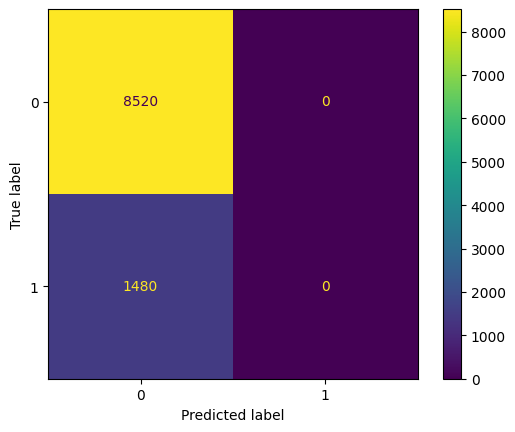

In [81]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_rfc.classes_)
cfd.plot()

### CLASSIFICATION REPORT

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000

